In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Load the CSV data into a DataFrame
df = pd.read_csv('staff_clock.csv')

In [15]:
# Display the first few rows of the DataFrame to understand its structure
df.head()

,id,name,date,start_time,end_time,status
0,16,Wrong Ron,2016-11-21,07:40:00,20:02:00,closed
1,17,Vitek,2016-11-21,08:00:00,19:11:00,closed
2,18,Ira,2016-11-21,14:00:00,17:11:00,closed
3,20,Vitek,2016-11-22,10:06:00,17:17:00,closed
4,21,Anna,2016-11-22,07:45:00,13:57:00,closed


In [16]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Convert 'start_time' and 'end_time' to datetime format, combining with 'date'
df['start_time'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['start_time'])
df['end_time'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['end_time'])

# Calculate the total working hours for each entry
df['total_hours'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 3600

In [17]:
# Display basic statistics
df.describe()

,id,date,start_time,end_time,total_hours
count,39882.000000,39882,39882,39882,39882.000000
mean,20384.530340,2021-05-22 16:19:16.852715520,2021-05-23 03:45:03.565392640,2021-05-23 09:45:29.277568768,6.007142
min,16.000000,2016-11-21 00:00:00,2016-11-21 07:40:00,2016-11-21 17:11:00,-23.450000
25%,10266.250000,2019-11-30 00:00:00,2019-11-30 08:08:31.500000,2019-11-30 14:53:54.500000,5.102222
50%,20412.500000,2021-08-02 00:00:00,2021-08-02 08:29:38,2021-08-02 15:02:52,6.448333
75%,30525.750000,2022-12-18 00:00:00,2022-12-18 07:53:12.500000,2022-12-18 15:19:04,7.509653
max,40646.000000,2024-08-01 00:00:00,2024-08-01 00:27:10,2024-08-01 20:11:40,21.736389
std,11715.964283,NaN,NaN,NaN,3.960661


In [18]:
# Calculate total working hours by each staff member
total_hours_by_staff = df.groupby('name')['total_hours'].sum()
total_hours_by_staff

name
Aaron                     2593.013889
Aleksandra                2568.760000
AlexRobles                 646.608333
AlexS                      927.844444
Alexa                      546.826389
                             ...     
test_editor2                 2.480833
test_editor3                 1.185000
tmchrstn2011@gmail.com    1699.676667
toby.tiet@gmail.com       7738.056667
travcimages@gmail.com     1585.263333
Name: total_hours, Length: 221, dtype: float64

In [19]:
# Calculate the average working hours per day for each staff member
avg_hours_per_day_by_staff = df.groupby('name')['total_hours'].mean()
avg_hours_per_day_by_staff

name
Aaron                     6.144583
Aleksandra                6.923881
AlexRobles                5.574210
AlexS                     7.930294
Alexa                     6.358446
                            ...   
test_editor2              0.826944
test_editor3              0.148125
tmchrstn2011@gmail.com    6.070274
toby.tiet@gmail.com       6.092958
travcimages@gmail.com     5.032582
Name: total_hours, Length: 221, dtype: float64

In [20]:
# Count the number of entries (shifts) per staff member
shifts_per_staff = df['name'].value_counts()
shifts_per_staff

name
Dasha                  1504
toby.tiet@gmail.com    1270
Vitek                  1164
Jason                  1087
Victoria                873
                       ... 
Armand                    1
Jariel                    1
Nikkole                   1
MillaV                    1
Pahidza                   1
Name: count, Length: 221, dtype: int64

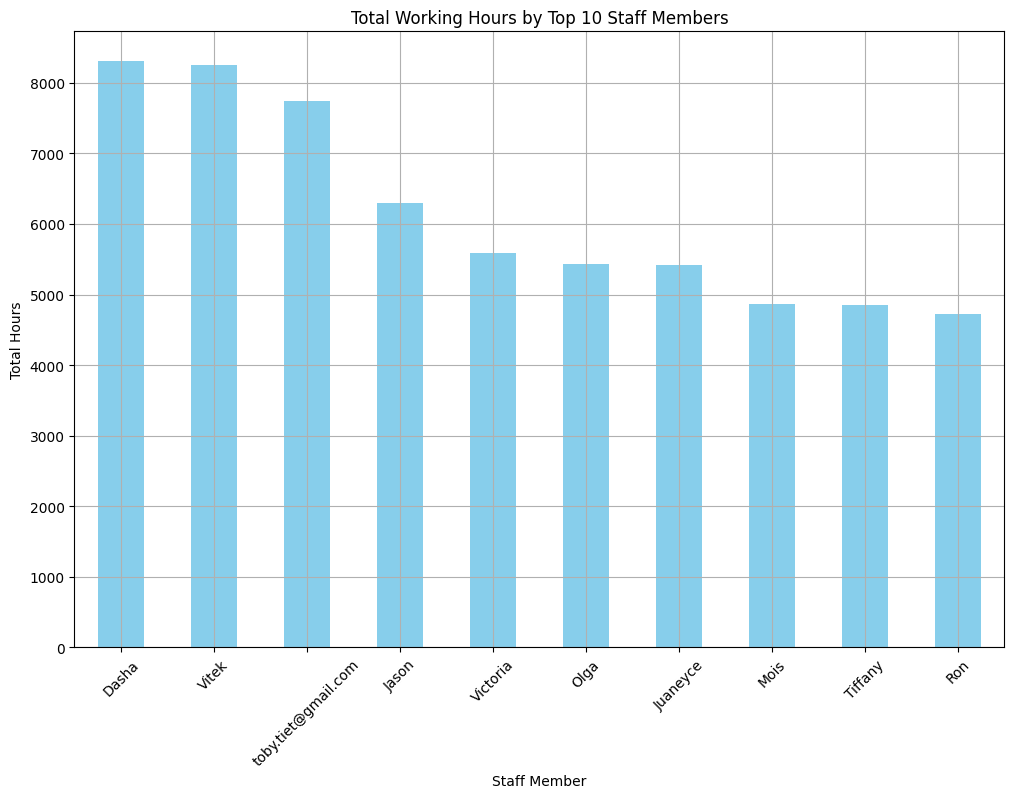

In [23]:
# Calculate total working hours by each staff member
total_hours_by_staff = df.groupby('name')['total_hours'].sum()

# Get top 10 staff members by total working hours
top_10_staff = total_hours_by_staff.nlargest(10)

# Plot total working hours by top 10 staff members
plt.figure(figsize=(12, 8))
top_10_staff.plot(kind='bar', color='skyblue')
plt.title('Total Working Hours by Top 10 Staff Members')
plt.xlabel('Staff Member')
plt.ylabel('Total Hours')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

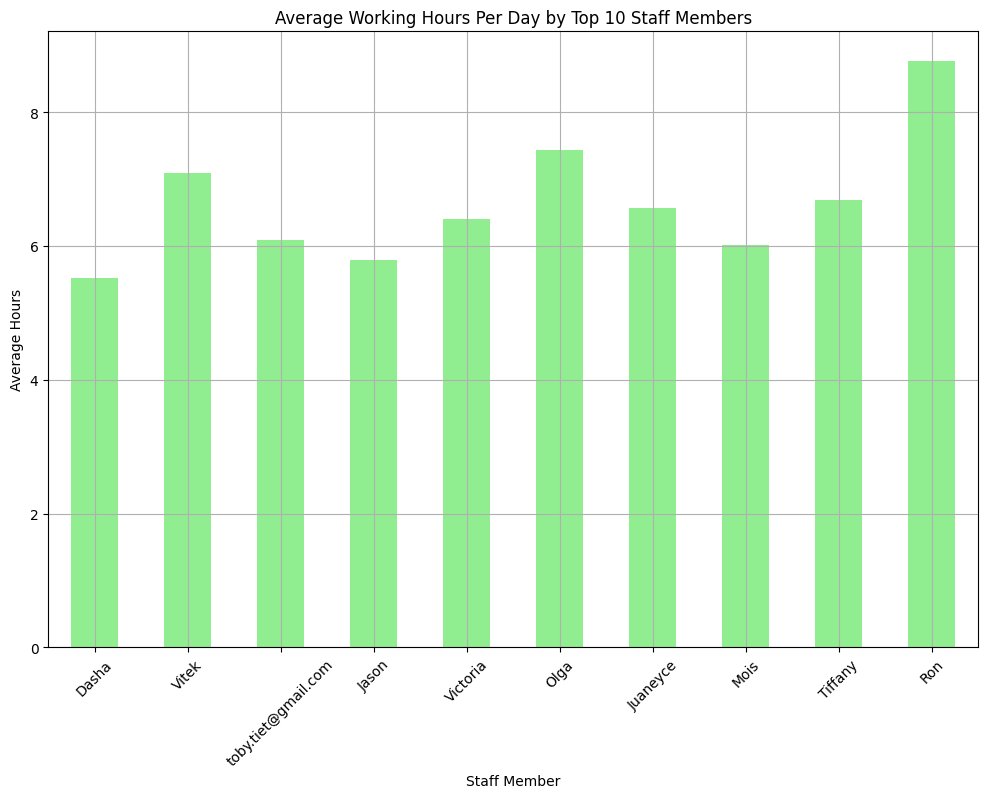

In [24]:
# Calculate the average working hours per day for top 10 staff members
avg_hours_per_day_by_staff = df[df['name'].isin(top_10_staff.index)].groupby('name')['total_hours'].mean()

# Plot average working hours per day by top 10 staff members
plt.figure(figsize=(12, 8))
avg_hours_per_day_by_staff.loc[top_10_staff.index].plot(kind='bar', color='lightgreen')
plt.title('Average Working Hours Per Day by Top 10 Staff Members')
plt.xlabel('Staff Member')
plt.ylabel('Average Hours')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()